### EDA To Prediction (DieTanic)

In [1]:
!python -V

Python 3.8.5


In [3]:
!which python

/Users/tf-mac-075/.pyenv/shims/python


##### #1

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

# warning 안보이기
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [12]:
import os
os.getcwd()

'/Users/tf-mac-075/Projects/kaggle/src'

In [18]:
data=pd.read_csv('/Users/tf-mac-075/Projects/kaggle/data/train.csv')

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
#null값 확인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age, Cabin 데이터 Null 값 많음

**얼마나 많이 살아남았는지 확인**

0    549
1    342
Name: Survived, dtype: int64


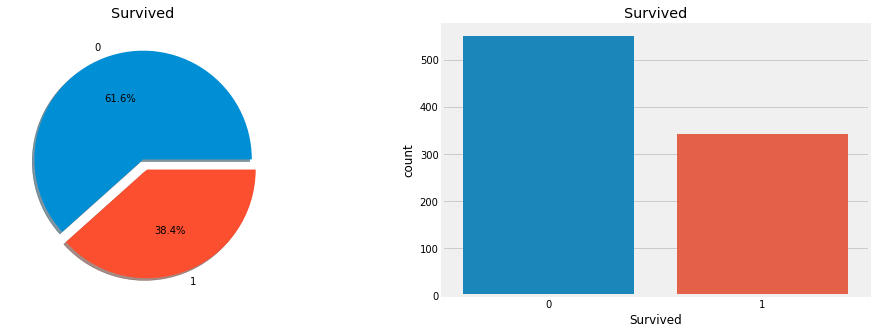

In [39]:
f, ax = plt.subplots(1,2,figsize=(15,5))

print(data['Survived'].value_counts())
#pie plot 그리기
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

# 막대 그래프
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- 총 342명 (38.4%)가 살아남음

**Feature 분석**

(1) 성별

In [40]:
data.groupby(['Sex', 'Survived']).Survived.count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

        Survived
Sex             
female  0.742038
male    0.188908


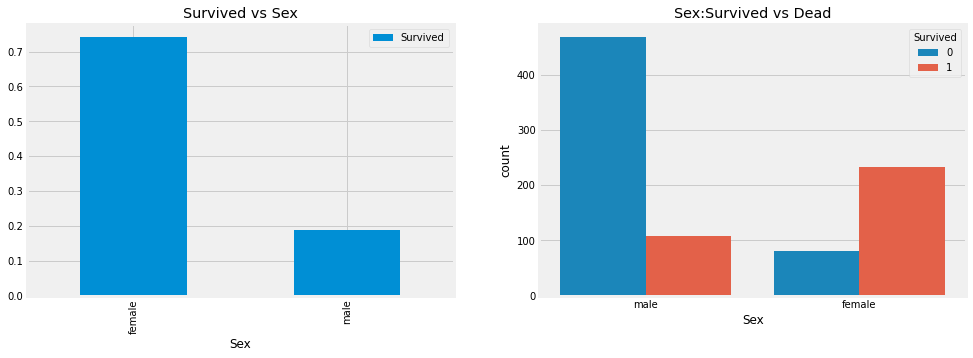

In [49]:
f, ax=plt.subplots(1, 2, figsize=(15, 5))

print(data[['Sex', 'Survived']].groupby('Sex').mean())
# 성별별 평균 생존율
data[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=data, ax = ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

- 여자의 74%, 남자의 18.8%가 생종했음
- 성별은 생존율에 중요한 변수임 

(2) Pclass

In [55]:
pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


3    491
1    216
2    184
Name: Pclass, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

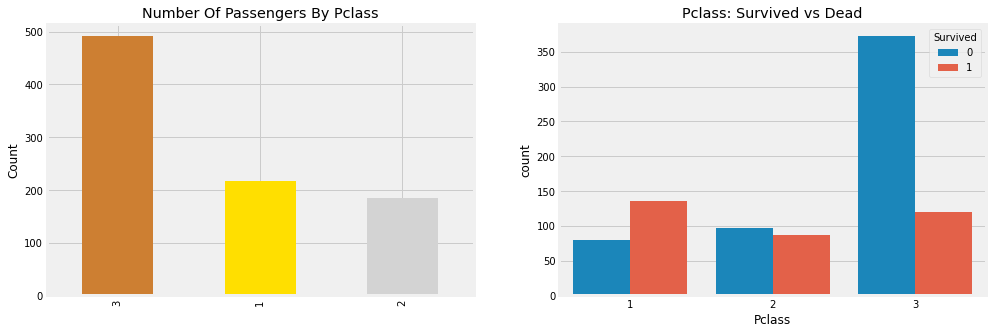

In [63]:
f,ax=plt.subplots(1,2,figsize=(15,5))

print(data.Pclass.value_counts())

data.Pclass.value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show

- 3번 클래스에 가장 많은 사람이 탔음 (491명)
- 3번 클래스에서 생존율이 매우 낮음
- 비교적 1번 클래스에 탄 사람들이 많이 살아남음

In [65]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

<function matplotlib.pyplot.show(close=None, block=None)>

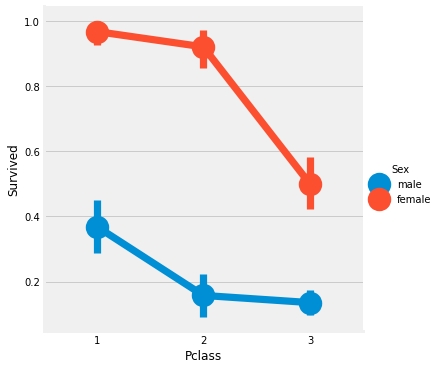

In [66]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show

(3) Age

In [68]:
print('가장 나이 많은 승객은', data.Age.max(), '살')
print('가장 어린 승객은', data.Age.min(), '살')
print('승객 평균 나이는', data.Age.mean(), '살')

가장 나이 많은 승객은 80.0 살
가장 어린 승객은 0.42 살
승객 평균 나이는 29.69911764705882 살


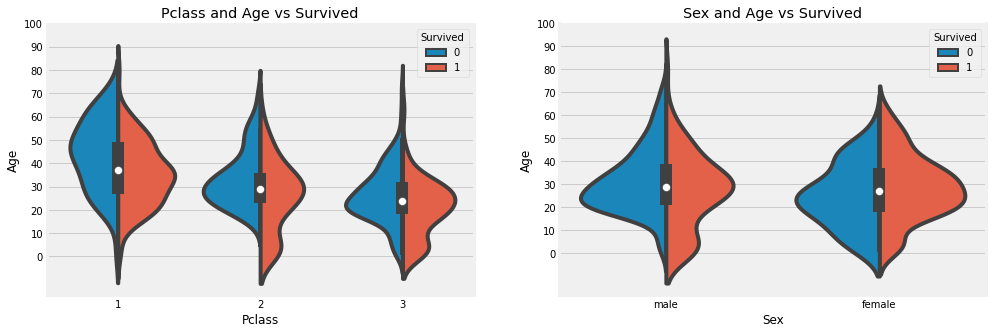

In [90]:
f, ax= plt.subplots(1,2,figsize=(15,5))
sns.violinplot(data.Pclass, data.Age, hue=data.Survived, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(data.Sex, data.Age, hue=data.Survived, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

**Age Null 값 채우기**  
그냥 평균으로 때려넣으면 안되기 때문에 적절한 그룹의 평균으로 채워넣고자 하는데,
이름을 기준으로 그룹핑해본다.

In [91]:
data['Initial']=0
for i in data:
    data.Initial=data.Name.str.extract('([A-Za-z]+)\.')

In [92]:
data[['Initial', 'Name']]

,Initial,Name
0,Mr,"Braund, Mr. Owen Harris"
1,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,Miss,"Heikkinen, Miss. Laina"
3,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,Mr,"Allen, Mr. William Henry"
...,...,...
886,Rev,"Montvila, Rev. Juozas"
887,Miss,"Graham, Miss. Margaret Edith"
888,Miss,"Johnston, Miss. Catherine Helen ""Carrie"""
889,Mr,"Behr, Mr. Karl Howell"


In [94]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- 오타 있음 -> 바꿔주기

In [96]:
data.Initial.replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [97]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [99]:
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 35
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'), 'Age'] = 46

In [100]:
data.Age.isnull().any()

False

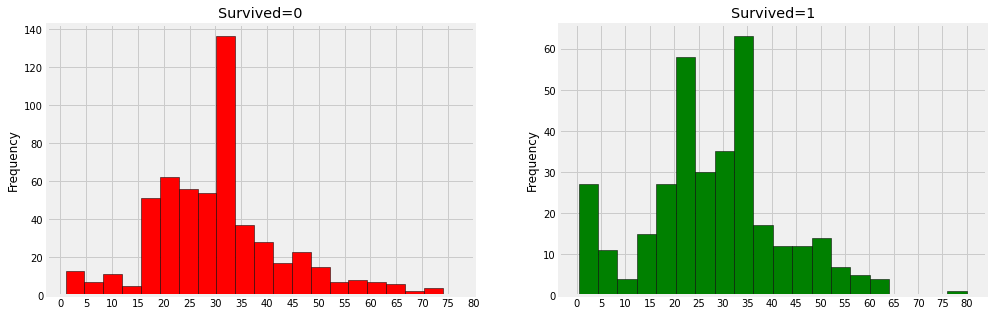

In [111]:
f,ax=plt.subplots(1,2,figsize=(15,5))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

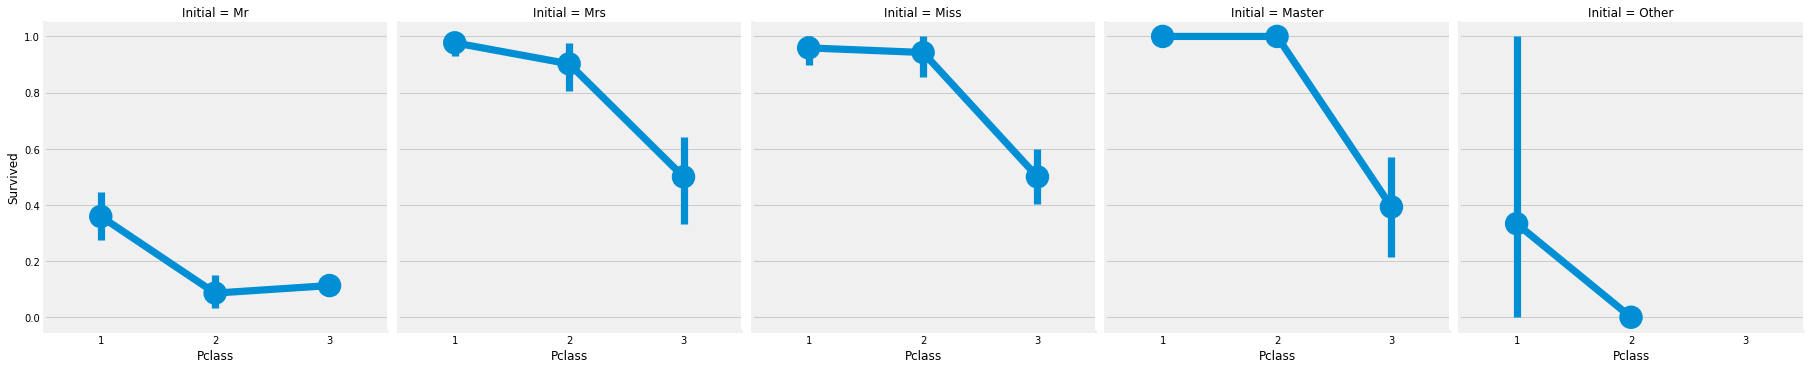

In [113]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

(4) Embarked

In [114]:
pd.crosstab([data.Embarked, data.Pclass],
           [data.Sex, data.Survived],
           margins=True).style.background_gradient(cmap='summer_r')

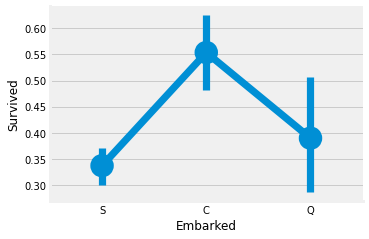

In [117]:
sns.factorplot('Embarked', 'Survived', data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

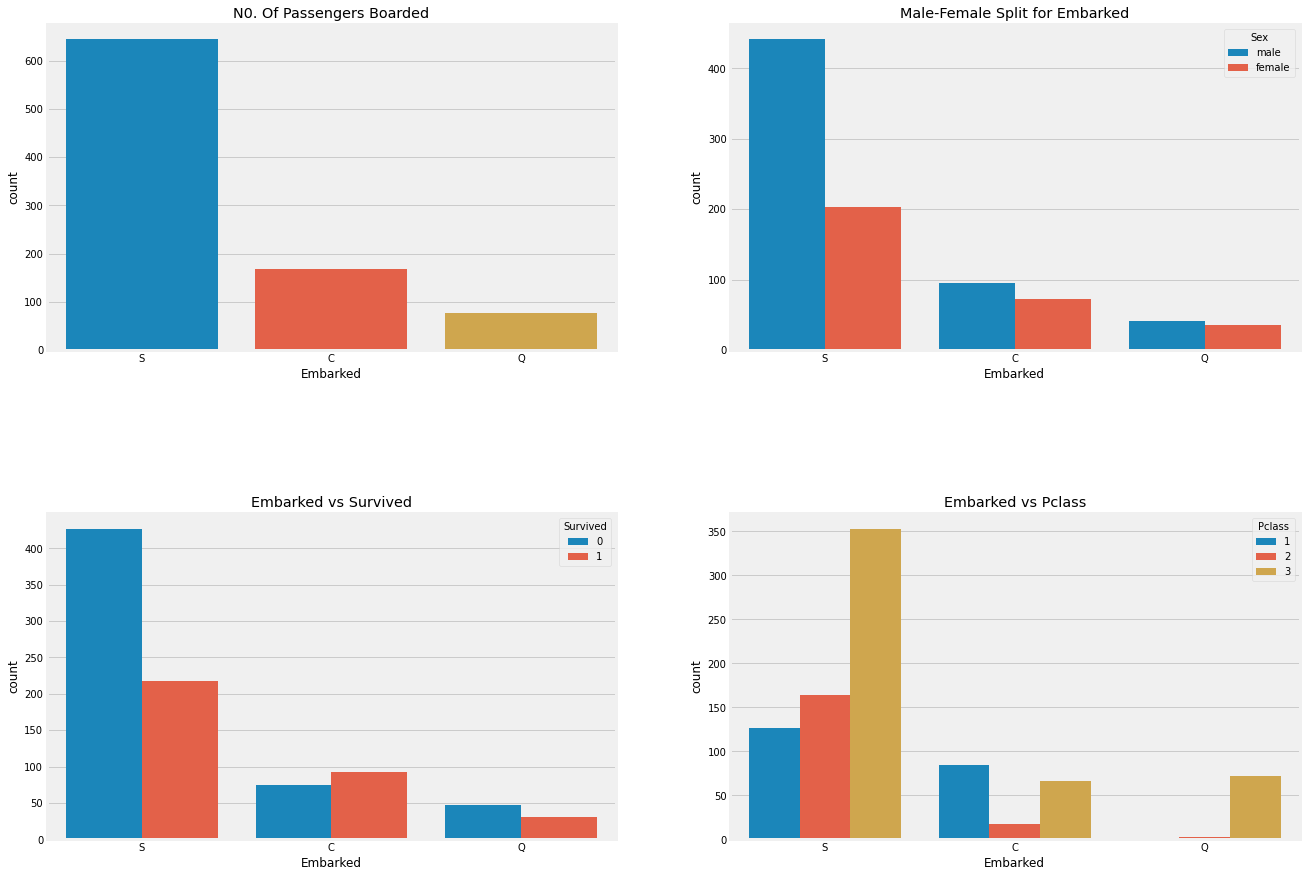

In [122]:
f, ax=plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('N0. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

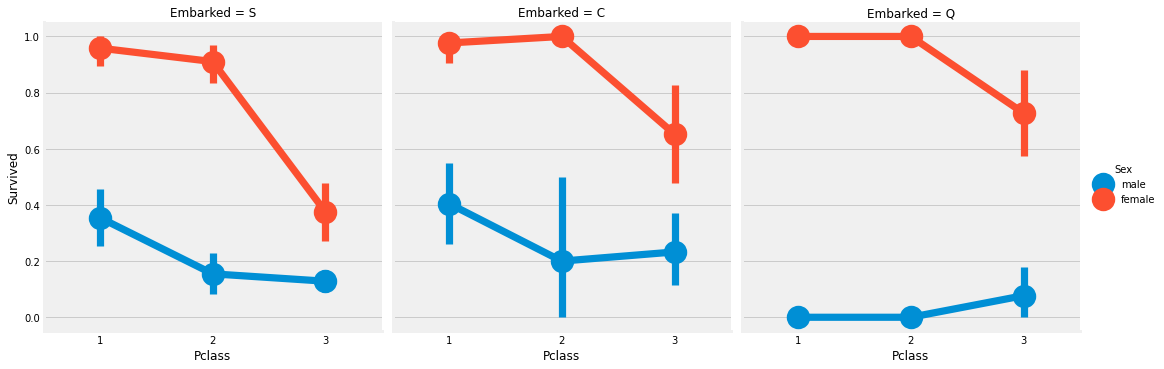

In [123]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', 
              data=data)
plt.show()